### Student Details

Student name: Mithun Thakkar

Student ID: 20017138

# Option 1: Logistic Regression and Multi-Class with scikit-learn

In [73]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import random
from sklearn.preprocessing import StandardScaler

## Part 2: Probabilistic Output

Wait, logistic regression is called regression for a reason. But we have implemented a classification? So let's remove the classification part and simply look at the probability output of logistic regression.

1. Adapt the LogisticRegression class to output probabilities rather than a binary class label. Note that the output of the sigmoid is interpretted as a probability.
2. Train on the same data as above
3. Generate several thousand examples (e.g. 5000) within a valid range (e.g. in this case, both axes between 3 and 8 and 0 and 6 respectively). Make sure the generation is uniform.
4. Predict the probability for each of our random samples
5. Provide a scatter plots of our random samples, with the colour showing the probability (you can just use `c=probas` assuming `probas` is the output of the algorithm, which will provide a scaling from blue to yellow)

#### Took this code from Task 1 and adapted the LogisticRegression class to output probabilities rather than a binary class label. 

In [58]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.activation(self.net_input(X))
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output))) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1/(1+np.exp(-np.clip(z, a_min = -250, a_max = 250)))

    def predict(self, X):
        return self.activation(self.net_input(X))

#### Trained on the same data as task 1

In [61]:
df = pd.read_csv('iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 42, stratify = y)
clf = LogisticRegressionGD()
clf.train(X_train, y_train)


<IPython.core.display.Javascript object>

#### Generated 5000 training examples within a valid range for the columns using random.uniform. 

In [47]:
test = []
for i in range(5000):
    test.append([random.uniform(3,8),random.uniform(0,6)])
test = np.array(test)
clf.predict(test)

array([0.99999372, 0.09857904, 0.67586557, ..., 0.01805962, 0.73148654,
       0.00376735])

#### Predicted the probability for each of our random samples and provided a scatter plot of our random samples, with the colour showing the probability below.

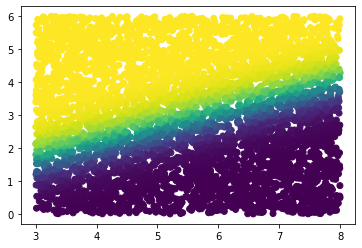

In [64]:
y_test=[clf.predict(test)]
plt.scatter(test[:,0], test[:,1], c = y_test)

## Part 3: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

#### Loaded below the petal length and petal width as the features and assigned the class labels.

In [71]:
y = df.iloc[:, 4].values
np.unique(y,return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [72]:
y = np.where(y == 'Iris-setosa', 0, np.where(y=='Iris-versicolor', 1,2))
np.unique(y,return_counts = True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [81]:
df.head()

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Loaded below all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. 
#### Used the scikit-learn train_test_split function to split into 30% test and 70% training data
#### Set the stratify parameter to y.
#### Also used the scikit-learn StandardScaler function to apply standard scaling to both training and test data and plotted the scaled data


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'X_Train Scaled')

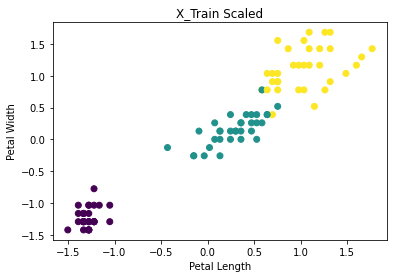

In [84]:
X = df.iloc[:, [2,3]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 42, stratify = y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# print scaled x train
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c = y_train)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("X_Train Scaled")

#### Trained below an instance of the scikitlearn LogisticRegression algorithm on the provided data

In [103]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

#### Plotted below the decision boundary using the supplied plot_decision_boundary function

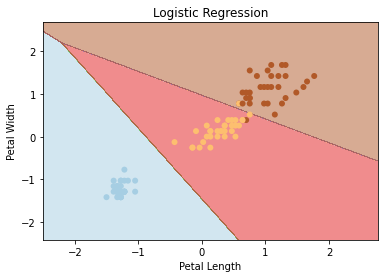

In [104]:
from plot_decision_boundary import plot_decision_boundary

plot_decision_boundary(X_train_scaled, y_train, clf)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Logistic Regression")
plt.show()

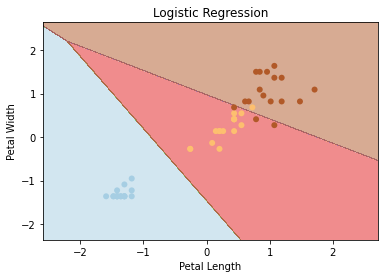

In [105]:
plot_decision_boundary(X_test_scaled, y_test, clf)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Logistic Regression")
plt.show()

#### Using sklearn's accuracy_score, calculated below the accuracy score on the test data

In [92]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test , y_pred))

Accuracy: 0.92


#### Plotted below the decision boundary with C =0.01 for classifier

In [98]:
clf = LogisticRegression(C = 0.01)
clf.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01)

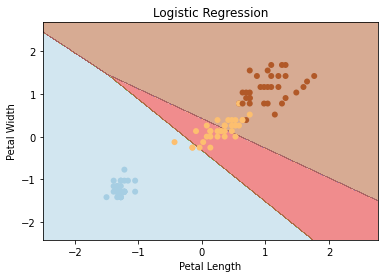

In [99]:
from plot_decision_boundary import plot_decision_boundary

plot_decision_boundary(X_train_scaled, y_train, clf)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Logistic Regression")
plt.show()

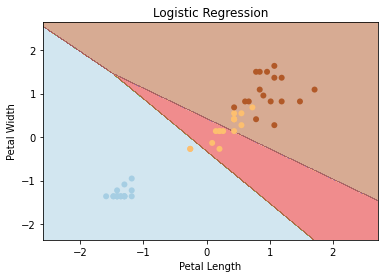

In [100]:
plot_decision_boundary(X_test_scaled, y_test, clf)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Logistic Regression")
plt.show()

#### Based on the decision boundaries above - I observed that a small C underfit the data and there are many misclassifications happening in the train dataset itself. That is because of higher bias and lower variance. The classifier performs even worse on test data with even more misclassifications. 

#### Plotted below the decision boundary with C =1000 for classifier

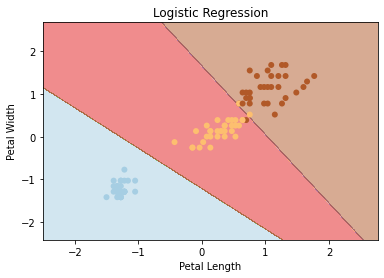

In [108]:
clf = LogisticRegression(C = 1000)
clf.fit(X_train_scaled, y_train)
plot_decision_boundary(X_train_scaled, y_train, clf)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Logistic Regression")
plt.show()

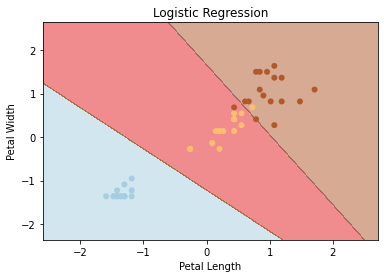

In [109]:
plot_decision_boundary(X_test_scaled, y_test, clf)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Logistic Regression")
plt.show()

#### A very large C above overfit the data with lower bias and higher variance. There are minimal misclassifications in the training data but the classifier does not generalize well to test data as it has 4 misclassifications in it. 